# Sparing og renter

Sparing og lån fører til beregninger som hver og en er ganske enkle, men som blir kjedelige å gjennomføre manuelt om man skal følge en konto over tid. Det er en repetetiv øvelse. I denne økta skal vi begynne med enkel sparing, og så skal vi ser hvor kompliserte situasjoner vi klarer å beskrive med penn og papir og med programmering. Vi kommer nok til å se at alle forsøk på å være matematisk lur går i knas så fort Norges Bank har rentemøte. 

In [1]:
# Demo-vindu +, -, *, / i løkke 

## Kjapp introduksjon/repetisjon av while-løkker

Når vi skal regne på spaing og renter, kan det fort oppstå situasjoner der vi ikke helt vet hvor lenge vi vi kjøre en løkke. Når vi bruker en for-løkke er det bestemt på forhånd hvor mange ganger løkka kan gå. Men om vi sparer til bil, og ikke vet hvor lang sparing som skal til, kan det hende at en while-løkke er tingen. En while løkke er en *tilstandsløkke*. Det vil si at den går så lenge en eller annen tilstand er oppfylt.

In [9]:
x = 1
while x < 10:
    x += 1
    print(x)

y = 0.1
counter = 0
while y < 100:
    y = y*1.03
    counter += 1
print("Det tok", counter, "runder i løkka")

2
3
4
5
6
7
8
9
10
Det tok 234 runder i løkka


Formelt kan vi si at det skal stå et boolsk uttrykk til høyre for `while`:

```python
while <kriterium>: 
    gjør noe
```

---
### Underveisoppgave
I hvilke av følgende tilfeller passer det med en for-løkke, og i hvilke passer det med en while-løkke?

- Pensjonssparing
- Spare til bil
- Lesing av fil
- Gjennomgang av liste eller array
---

---

### Underveisoppgave: forrenting
Kari har 100 000 kroner på sparekontoen, som hun har tjent på sommerjobber de siste årene. Hun planlegger å spare disse pengene i banken for å få råd til leielighet en dag. For å få råd til leielighet trenger hun 300 000 kroner i egenkapital. 

**a)** Med en rente på 3 %, virker dette som en god plan?

**b)** Løs denne oppgaven med programmering

---

In [10]:
# Live-programmering av forrenting 100 000 kroner med 3 % rente, når blir det 300 000?

Denne oppgaven bør gå greit. Vi setter opp likningen for forrenting

$$
f(n) = f_0 \cdot 1.03^n
$$

Så kan vi ta fram kalkulatoren og prøve oss fram. Eller kanskje enda bedre, bruke solve i geogebra. 
`Intersect(f, y=3)`, og få svaret til å bli omtrent 37 år. 

Men hva er da egentlig rente? Vel, det er jo bare en regel som sier at etter så og så lang tid, så ganges pengene du har med et eller annet tall. Altså:

$$
x_{n+1} = r x_n
$$

Og vi vet at om $r$ er en konstant, så kommer løsningen av denne likningen til å være 

$$
x_n = C r^n
$$

Og hvis vi skal kunne spørre for hvilken $n$ får vi en bestemt sum, så må vi på videregående for å lære logaritmer. 

Eller, vi kan lage oss en løkke:

In [11]:
x = 100000
rente = 3
vekstfaktor = 1 + rente/100
tid = 0
while x < 300000:
    x = x * vekstfaktor
    tid += 1  
    
print("Det er nok penger etter", tid, "år.")
print("Da er det", round(x, 2), "kroner på konto")

Det er nok penger etter 38 år.
Da er det 307478.35 kroner på konto


Så vel så bra, men det er en dårlig plan for Kari. Problemet er at hun ikke har nok penger, og hun trenger nok derfor å spare mer. Men hvordan regner vi på det? 

Dette er for eksempel noe bankene må gjøre hele tiden. De ganger saldoen vår med et tall fra tid til annen, men i tillegg så legger de på saldoen dersom vi setter inn penger. 

Kari er 18 år gammel og sparer til bolig. Hun har 100 000 kroner på konto fra tidligere sommerjobber, og sparer nå 15000 kroner per år. Hun trenger å spare 300 000 kroner for å ha nok egenkapital til en leilighet som koster 2 millioner kroner. Vi kan legge til grunn en rente på 3 %. Er dette en god plan?

Vi har altså å gjøre med en ny likning

$$
x_{n+1} = 1.03 \cdot x_n + 15000
$$

---

### Underveisoppgave: Fast sparing med fast rente
Kari sparer med fast rente og fast sparebeløp slik at

$$
x_{n+1} = 1.03 \cdot x_n + 15000
$$

$$
x_0 = 100000
$$

Hun trenger en egenkapital på kr 300000.

**a)** Hvor lenge må hun spare før hun får råd til bolig?

Vanligvis setter man sparebeløpet for å rekke å ha penger i tide

**b)** Kari er 18 år gammel og planlegger å ha råd til bolig når hun er ferdig med å studere, altså når hun er 24 år. Hvor mye må hun spare per år for å rekke dette?

---

In [7]:
# Løsningsforslag for oppgave b)
rente = 3 # i prosent
vekstfaktor = 1 + rente/100
sparemål = 300000

sparerate = 15000
saldo = 100000

while saldo < sparemål:
    saldo = 100000
    tid = 0
    for i in range(6):
        saldo = saldo * vekstfaktor + sparerate
        tid += 1
    sparerate += 1
    
print("Tid:", tid, "år, saldo:", saldo, "sparerate: ", sparerate)
    
    

Tid: 6 år, saldo: 300003.2336225561 sparerate:  27921


Vi kan også her trylle fram en løsning om vi har vært på universitetet og regnet litt:

$$
x_n = 600000\cdot 1.03^n - 500000
$$

Og derifra kan vi regne ut nøyaktig hvor lang tid det tar å spare. 

Men dette kan vi ikke gjøre på ungdomsskolen, og jeg måtte åpne opp boka til Tom Lindstrøm fra mattekurset her på blindern for å løse den likningen. Vi kan jo mye heller bare programmere det.

Det er overraskende at noe så enkelt som fast sparing med fast rente kan føre oss til universitetsmatematikken. Men slik er det altså. Heldigvis kan programmering ta dette til ungdomsskolen. Og ikke nok med det. Når vi først er der at vi skjønner hvordan dette kan programmeres, så kan vi begynne å la renta variere. For alle forsøk på spissfindig matematikk for å løse spareberegninger går i vasken så fort Norges Bank har rentemøte. 

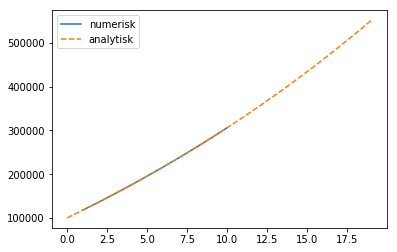

In [9]:
from pylab import *

x = 100000
rente = 3 # 3 %, fint for elevene å få repetert hva % betyr
vekstfaktor = 1 + rente/100
sparing = 15000
tid = 0

saldoer = []
tider = []

while x < 300000:
    x = x * vekstfaktor + sparing
    tid += 1
    saldoer.append(x)
    tider.append(tid)
    
plot(tider, saldoer, label='numerisk')

# For ordens skyld kan vi også plotte den analytiske løsningen fra hatten
n = array(range(0, 20))
y = 600000*1.03**n - 500000
plot(n, y, "--", label='analytisk')
legend()
show()

## Reelle historiske rentedata

Vi har laget en fil, [innskuddsrente.txt](innskuddsrente.txt), som inneholder gjennomsnittlig innskuddrente for forbrukere i norske banker siden 1980. Dataene er hentet fra SSB. Vi har lagt ved et eksempel på hvordan man henter disse dataene fra SSB nederst på siden. 

Men la oss nå for enkelhets skyld bruke disse dataene til å simulere utviklingen i verdien til en konto med og uten sparing fra 1980 og fram til i dag. 

Nå kan vi bare glemme å regne på dette analytisk. Dessuten er det slik som dette verden faktisk ser ut. Det er helt urealistisk å anta at det er fast rente på sparing over mange år. 

Vi begynner med å laste inn og plotte renten bare slik at vi ser at dataene er lastet inn riktig. 

Last ned eller kopiér filen `innskuddsrente.txt` fra **bit.ly/2VR9VKw**

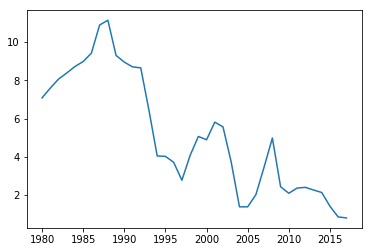

In [10]:
# Innlasting av innskuddsrenter fra tekstfil
rentedata = loadtxt("innskuddsrente.txt")
år = rentedata[:,0]
rente = rentedata[:,1]

plot(år, rente)

Text(0,0.5,'Rente, %')

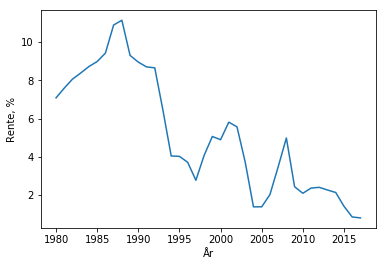

In [11]:
rentedata = loadtxt("innskuddsrente.txt")
år = rentedata[:,0]
rente = rentedata[:,1]

plot(år, rente)
xlabel('År')
ylabel('Rente, %')

---

## Underveisoppgave
Vi skal nå bruke reelle historiske rentedata til å simulere hvordan spareplanene til Kari ville gått fra 1980 og fram til i dag. 

**a)** Lag et program som simulerer hvordan Kari sin spareplan: 100000 startkapital, 15000 kr/år ville fungert om hun startet i 1980.

**b)** Prøv denne spareplanen for forskjellige starttidspunkter fra 1980 og fram til i dag

---

In [12]:
# Live-programmering av sparing med reelle data

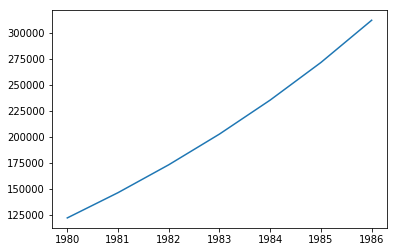

In [13]:
saldo = 100000
sparerate = 15000
saldoliste = []
årliste = []
i = 0

while saldo < 300000:
    vekstfaktor = 1 + rente[i]/100
    saldo = saldo * vekstfaktor + sparerate
    saldoliste.append(saldo)
    årliste.append(år[i])
    i+=1

plot(årliste, saldoliste)

Nå er det endelig skikkelig gøy. Her kan man eksperimentere i vei, og se på hva som skal til for å kunne spare det man trenger. 

# Hvor ellers finner vi vekstfaktorer?

- Bakterievekst
- Befolkningsvekst
- Celledeling
- Rusmidler
- Kjernereaksjoner
- Makroøkonomi
- Pyramidespill
- etc.

```python
for ...
    x[n+1] = x[n] * vekstfaktor + påslag
````

## Hente data med API-kall fra SSB

**ADVARSEL** *Dette er for spesielt interesserte. Vi legger ut datasett for våre kurs på nettsidene våre slik at de kan brukes uten å gjøre spørringer mot SSB sin database* 

Vi kan hente data fra SSB for å studere dette. Det innebærer noen besvergelser, men man kan eksportere dataene som 

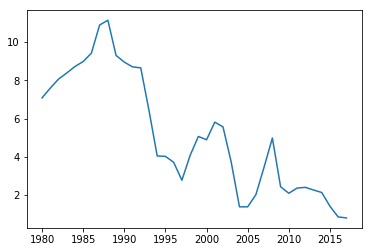

In [8]:
# Post spørring og få Pandas dataframe i retur
from pylab import *
from pyjstat import pyjstat
import requests
import json

# Dette er adressen til en tabell hos SSB. Det svarer til en nettside med data
# f. eks. https://www.ssb.no/statbank/table/08175/
POST_URL = 'https://data.ssb.no/api/v0/no/table/08175'

# API spørring. Dette er en klump med tekst som sier hvilke data vi vil hente 
# fra tabellen
payload = json.loads(
    """
    {"query": [
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Bankinnskuddrente"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat"
  }
}
""")
# Linja under legger til årstallene vi vil hente data for. 
# Vi gjør det her bare fordi det er lettere å lage mange tall
# med programmering enn å skrive opp alle i strengen over.
payload['query'][1]['selection']['values'] = list(range(1980, 2018))
resultat = requests.post(POST_URL, json = payload)

dataset = pyjstat.Dataset.read(resultat.text)
df = dataset.write('dataframe')
plot(array(df['år'], dtype=float64), df['value'])

with open("innskuddsrente.txt", 'w') as ofile:
    ofile.write("# år rente \n")
    for year, value in zip(df['år'], df['value']):
        ofile.write(str(year) + " " +  str(value) + "\n")
    

## Hente data fra Norges Bank

Vi kunne også sett på hvor mye det ville lønnet seg å investere i forskjellige typer finansielle instrumenter de siste årene. Da kan det være lurt å hente datasett utenfra. Det er vanligvis et sett med besvergelser som må på plass for at man skal få ut slike data. Men så kan de behandles som ethvert annet datasett. 

FREQ             FREQ                                                Frequency
                 A                                                      Annual
                 B                                                    Business
                 M                                                     Monthly
INSTRUMENT_TYPE  INSTRUMENT_TYPE                               Instrument Type
                 GBON                                         Government bonds
                 KPRA                                          Key policy rate
                 NOWA                                                     NOWA
                 TBIL                                           Treasury bills
TENOR            TENOR                                                   Tenor
                 10Y                                                  10 years
                 12M                                                 12 months
                 3M                                 

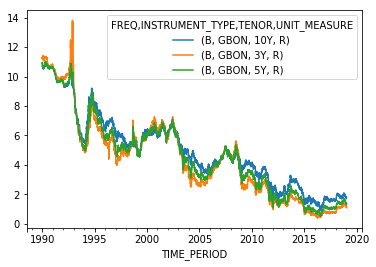

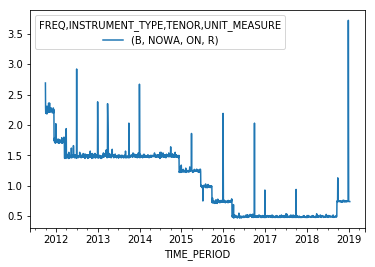

In [9]:
import pandasdmx
from pandasdmx import Request

nbank = Request('NB')

#print(nbank)

response = nbank.dataflow('IR')
response.dataflow.IR.structure(request=True, target_only=False)
print(response.write().codelist['name'])


response = nbank.data('IR', key={"FREQ": "B", 
                             "INSTRUMENT_TYPE": "GBON", 
                             "TENOR": "3Y+5Y+10Y",}, 
                      params={"startPeriod": "1990"})

data = response.write(s for s in response.data.series)
data.plot()

response = nbank.data('IR', key={"FREQ": "B", 
                             "INSTRUMENT_TYPE": "NOWA", 
                             "TENOR": "ON",
                            "UNIT_MEASURE":"R"}, 
                      params={"startPeriod": "1990"})

data = response.write(s for s in response.data.series)
data.plot()
